In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os

In [ ]:
cd /content/gdrive/MyDrive/FINN

[Errno 2] No such file or directory: '/content/gdrive/MyDrive/FINN'
/content


In [ ]:
while True:
  pass

KeyboardInterrupt: 

# **GBM Call Result Analysis**

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_call_trained_models/results_call_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("gbm_call_trained_models/gbm_aggregated_results.csv", index=False)

   option_rmad_result_mean_volatility_0.125  \
0                                     0.022   
1                                     0.024   
2                                     0.025   
3                                     0.026   
4                                     0.026   

   option_rmad_result_std_volatility_0.125  \
0                                    0.005   
1                                    0.005   
2                                    0.006   
3                                    0.006   
4                                    0.006   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.020   
1                                     0.021   
2                                     0.022   
3                                     0.022   
4                                     0.023   

   option_rmse_result_std_volatility_0.125  \
0                                    0.004   
1                                    0.005   
2                  

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

metric_data = {}
for seed in seeds:
    metric_data[seed] = []

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_call_trained_models/results_call_{volatility}_{seed}_.csv"

        try:
            df = pd.read_csv(filename)
            if 'option_mad_result' in df.columns:
                data_frames.append(df['option_mad_result'])
                metric_data[seed].append(df['option_mad_result'].mean())
            else:
                print(f"'option_mad_result' not found in {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

seed_mad_values = {}
for seed, values in metric_data.items():
    if values:
        mean_value = np.mean(values)
        mad = np.mean([abs(value - mean_value) for value in values])
        seed_mad_values[seed] = mad

min_mad_seed = min(seed_mad_values, key=seed_mad_values.get)
print(f"Seed with the smallest MAD for option_mad_result: {min_mad_seed}")

Seed with the smallest MAD for option_mad_result: 496


In [ ]:
import os
import shutil

base_directory = '/content/gdrive/MyDrive/Amine Paper/gbm_results'

call_directory = os.path.join(base_directory, 'call_images')
put_directory = os.path.join(base_directory, 'put_images')

os.makedirs(call_directory, exist_ok=True)
os.makedirs(put_directory, exist_ok=True)

files = os.listdir(base_directory)

for file_name in files:
    if 'call' in file_name.lower() and '496' in file_name.lower():
        shutil.move(os.path.join(base_directory, file_name), call_directory)
    if 'put' in file_name.lower() and '492' in file_name.lower():
        shutil.move(os.path.join(base_directory, file_name), put_directory)

# **GBM Put Result Analysis**

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_put_trained_models/results_put_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("gbm_put_trained_models/gbm_aggregated_results.csv", index=False)

   option_rmad_result_mean_volatility_0.125  \
0                                     0.021   
1                                     0.023   
2                                     0.025   
3                                     0.025   
4                                     0.026   

   option_rmad_result_std_volatility_0.125  \
0                                    0.006   
1                                    0.007   
2                                    0.008   
3                                    0.008   
4                                    0.009   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.021   
1                                     0.022   
2                                     0.023   
3                                     0.024   
4                                     0.024   

   option_rmse_result_std_volatility_0.125  \
0                                    0.006   
1                                    0.006   
2                  

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

metric_data = {}
for seed in seeds:
    metric_data[seed] = []

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_put_trained_models/results_put_{volatility}_{seed}_.csv"

        try:
            df = pd.read_csv(filename)
            if 'option_mad_result' in df.columns:
                data_frames.append(df['option_mad_result'])
                metric_data[seed].append(df['option_mad_result'].mean())
            else:
                print(f"'option_mad_result' not found in {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

seed_mad_values = {}
for seed, values in metric_data.items():
    if values:
        mean_value = np.mean(values)
        mad = np.mean([abs(value - mean_value) for value in values])
        seed_mad_values[seed] = mad

min_mad_seed = min(seed_mad_values, key=seed_mad_values.get)
print(f"Seed with the smallest MAD for option_mad_result: {min_mad_seed}")

Seed with the smallest MAD for option_mad_result: 492


# **Heston Call Result Analysis**

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"heston_call_trained_models/heston_results_call_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("heston_call_trained_models/heston_aggregated_results.csv", index=False)

   option_rmad_result_mean_volatility_0.125  \
0                                     0.029   
1                                     0.032   
2                                     0.035   
3                                     0.037   
4                                     0.039   

   option_rmad_result_std_volatility_0.125  \
0                                    0.015   
1                                    0.015   
2                                    0.016   
3                                    0.016   
4                                    0.016   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.026   
1                                     0.028   
2                                     0.030   
3                                     0.032   
4                                     0.033   

   option_rmse_result_std_volatility_0.125  \
0                                    0.013   
1                                    0.013   
2                  

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

metric_data = {}
for seed in seeds:
    metric_data[seed] = []

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"heston_call_trained_models/heston_results_call_{volatility}_{seed}_.csv"

        try:
            df = pd.read_csv(filename)
            if 'option_mad_result' in df.columns:
                data_frames.append(df['option_mad_result'])
                metric_data[seed].append(df['option_mad_result'].mean())
            else:
                print(f"'option_mad_result' not found in {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

seed_mad_values = {}
for seed, values in metric_data.items():
    if values:
        mean_value = np.mean(values)
        mad = np.mean([abs(value - mean_value) for value in values])
        seed_mad_values[seed] = mad

min_mad_seed = min(seed_mad_values, key=seed_mad_values.get)
print(f"Seed with the smallest MAD for option_mad_result: {min_mad_seed}")

Seed with the smallest MAD for option_mad_result: 497


In [ ]:
import os
import shutil

base_directory = '/content/gdrive/MyDrive/Amine Paper/heston_results'

call_directory = os.path.join(base_directory, 'call_images')
put_directory = os.path.join(base_directory, 'put_images')

os.makedirs(call_directory, exist_ok=True)
os.makedirs(put_directory, exist_ok=True)

files = os.listdir(base_directory)

for file_name in files:
    if 'call' in file_name.lower() and '413' in file_name.lower():
        shutil.move(os.path.join(base_directory, file_name), call_directory)
    if 'put' in file_name.lower() and '492' in file_name.lower():
        shutil.move(os.path.join(base_directory, file_name), put_directory)

# **Heston Put Result Analysis**

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"heston_put_trained_models/heston_results_put_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("heston_put_trained_models/heston_aggregated_results.csv", index=False)


   option_rmad_result_mean_volatility_0.125  \
0                                     0.030   
1                                     0.033   
2                                     0.036   
3                                     0.038   
4                                     0.039   

   option_rmad_result_std_volatility_0.125  \
0                                    0.018   
1                                    0.019   
2                                    0.020   
3                                    0.021   
4                                    0.021   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.027   
1                                     0.029   
2                                     0.031   
3                                     0.033   
4                                     0.034   

   option_rmse_result_std_volatility_0.125  \
0                                    0.016   
1                                    0.016   
2                  

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

metric_data = {}
for seed in seeds:
    metric_data[seed] = []

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"heston_put_trained_models/heston_results_put_{volatility}_{seed}_.csv"

        try:
            df = pd.read_csv(filename)
            if 'option_mad_result' in df.columns:
                data_frames.append(df['option_mad_result'])
                metric_data[seed].append(df['option_mad_result'].mean())
            else:
                print(f"'option_mad_result' not found in {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

seed_mad_values = {}
for seed, values in metric_data.items():
    if values:
        mean_value = np.mean(values)
        mad = np.mean([abs(value - mean_value) for value in values])
        seed_mad_values[seed] = mad

min_mad_seed = min(seed_mad_values, key=seed_mad_values.get)
print(f"Seed with the smallest MAD for option_mad_result: {min_mad_seed}")

Seed with the smallest MAD for option_mad_result: 491


In [ ]:
cd heston_put_trained_models/

/content/gdrive/MyDrive/Amine Paper/heston_put_trained_models


In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

metric_data = {}
for seed in seeds:
    metric_data[seed] = []

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"heston_call_trained_models/heston_results_call_{volatility}_{seed}_.csv"

        try:
            df = pd.read_csv(filename)
            if 'option_mad_result' in df.columns:
                data_frames.append(df['option_mad_result'])
                metric_data[seed].append(df['option_mad_result'].mean())
            else:
                print(f"'option_mad_result' not found in {filename}")
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

seed_mad_values = {}
for seed, values in metric_data.items():
    if values:
        mean_value = np.mean(values)
        mad = np.mean([abs(value - mean_value) for value in values])
        seed_mad_values[seed] = mad

min_mad_seed = min(seed_mad_values, key=seed_mad_values.get)
print(f"Seed with the smallest MAD for option_mad_result: {min_mad_seed}")

Seed with the smallest MAD for option_mad_result: 497


# **GBM Gamma Result Analysis**

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_gamma_call_trained_models/30 Days/results_call_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("gbm_gamma_call_trained_models/30 Days/gbm_gamma_aggregated_results_30_days.csv", index=False)

   option_rmad_result_mean_volatility_0.125  \
0                                     0.003   
1                                     0.003   
2                                     0.003   
3                                     0.003   
4                                     0.003   

   option_rmad_result_std_volatility_0.125  \
0                                    0.001   
1                                    0.001   
2                                    0.002   
3                                    0.002   
4                                    0.002   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.003   
1                                     0.003   
2                                     0.003   
3                                     0.003   
4                                     0.003   

   option_rmse_result_std_volatility_0.125  \
0                                    0.001   
1                                    0.001   
2                  

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"gbm_gamma_call_trained_models/90 Days/results_call_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("gbm_gamma_call_trained_models/90 Days/gbm_gamma_aggregated_results_90_days.csv", index=False)

   option_rmad_result_mean_volatility_0.125  \
0                                     0.003   
1                                     0.003   
2                                     0.003   
3                                     0.003   
4                                     0.004   

   option_rmad_result_std_volatility_0.125  \
0                                    0.003   
1                                    0.003   
2                                    0.003   
3                                    0.003   
4                                    0.004   

   option_rmse_result_mean_volatility_0.125  \
0                                     0.003   
1                                     0.003   
2                                     0.003   
3                                     0.003   
4                                     0.003   

   option_rmse_result_std_volatility_0.125  \
0                                    0.002   
1                                    0.003   
2                  

# **Put-Call Parity (GBM)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
 cd /content/drive/MyDrive/Amine Paper/

/content/drive/MyDrive/Amine Paper


In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

seeds_list = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
vol_list = [0.125, 0.15, 0.175]
days_list = [60,70,80,90,100,110,120]
n_S = 10000
S_array = np.linspace(75, 125, n_S)
K_vals = np.arange(90,111,1)
r_val = 0.00

results = []

for vol in vol_list:
    for days in days_list:
        T_val = days / 250

        mae_list = []
        mse_list = []

        for seed in seeds_list:
            call_model_path = f'gbm_call_trained_models/gbm_european_call_{vol}_{seed}.h5'
            put_model_path  = f'gbm_put_trained_models/gbm_european_put_{vol}_{seed}.h5'

            if (not os.path.exists(call_model_path)) or (not os.path.exists(put_model_path)):
                print(f"Skipping vol={vol}, T={days}, seed={seed}, missing .h5 file")
                continue

            call_model = tf.keras.models.load_model(call_model_path)
            put_model  = tf.keras.models.load_model(put_model_path)

            parity_errors_2d = np.zeros((n_S, len(K_vals)), dtype=np.float64)

            discount = math.exp(-r_val * T_val)

            for k_index, K_num in enumerate(K_vals):
                S_lin = S_array.reshape(-1,1)
                K_lin = np.full_like(S_lin, K_num, dtype=np.float64)
                T_lin = np.full_like(S_lin, T_val, dtype=np.float64)
                r_lin = np.full_like(S_lin, r_val,  dtype=np.float64)

                S_tf = tf.constant(S_lin, dtype=tf.float64)
                K_tf = tf.constant(K_lin, dtype=tf.float64)
                T_tf = tf.constant(T_lin, dtype=tf.float64)

                X_call = tf.concat([
                    S_tf / (K_tf * tf.exp(-r_lin*T_tf)),
                    T_tf
                ], axis=1)
                outC = call_model(X_call)
                call_vals = K_tf * tf.where(
                    tf.greater(T_tf, 1e-3),
                    outC,
                    tf.maximum(S_tf/K_tf - 1.0, 0.0)
                )
                call_np = call_vals.numpy().reshape(-1)

                X_put = tf.concat([
                    S_tf / (K_tf * tf.exp(-r_lin*T_tf)),
                    T_tf
                ], axis=1)
                outP = put_model(X_put)
                put_vals = K_tf * tf.where(
                    tf.greater(T_tf, 1e-3),
                    outP,
                    tf.maximum(1.0 - S_tf/K_tf, 0.0)
                )
                put_np = put_vals.numpy().reshape(-1)

                theory_diff = (S_lin.flatten() - K_num*discount)
                model_diff  = (call_np - put_np)

                parity_err = model_diff - theory_diff
                parity_errors_2d[:, k_index] = parity_err

            mae_seed = np.mean(np.abs(parity_errors_2d))
            mse_seed = np.mean(parity_errors_2d**2)
            mae_list.append(mae_seed)
            mse_list.append(mse_seed)

        if len(mae_list) > 0:
            mae_mean = np.mean(mae_list)
            mae_std  = np.std(mae_list, ddof=1)
            mse_mean = np.mean(mse_list)
            mse_std  = np.std(mse_list, ddof=1)
        else:
            mae_mean, mae_std, mse_mean, mse_std = (None, None, None, None)

        results.append({
            "Vol": vol,
            "TTM_days": days,
            "ParMAE_Mean": mae_mean,
            "ParMAE_Std": mae_std,
            "ParMSE_Mean": mse_mean,
            "ParMSE_Std": mse_std
        })

df = pd.DataFrame(results)
df.sort_values(by=["Vol","TTM_days"], inplace=True)
df.reset_index(drop=True, inplace=True)

print("\n===== PUT–CALL PARITY TABLE (Mean & Std across 10 seeds) =====")
print(df)
print("===============================================================")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



===== PUT–CALL PARITY TABLE (Mean & Std across 10 seeds) =====
      Vol  TTM_days  ParMAE_Mean  ParMAE_Std  ParMSE_Mean  ParMSE_Std
0   0.125        60     0.078346    0.023804     0.011007    0.004775
1   0.125        70     0.080983    0.025394     0.011799    0.005255
2   0.125        80     0.082153    0.026635     0.012214    0.005606
3   0.125        90     0.082554    0.027166     0.012317    0.005738
4   0.125       100     0.082475    0.026866     0.012189    0.005637
5   0.125       110     0.081977    0.026131     0.011880    0.005368
6   0.125       120     0.081274    0.025055     0.011405    0.005026
7   0.150        60     0.103331    0.071471     0.022689    0.031261
8   0.150        70     0.107949    0.070901     0.024182    0.031849
9   0.150        80     0.111637    0.071062     0.025328    0.032910
10  0.150        90     0.114687    0.072265     0.026229    0.034651
11  0.150       100     0.117040    0.074149     0.026982    0.036988
12  0.150       110     0.

<ipython-input-54-ac3e96fc786e>:98: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


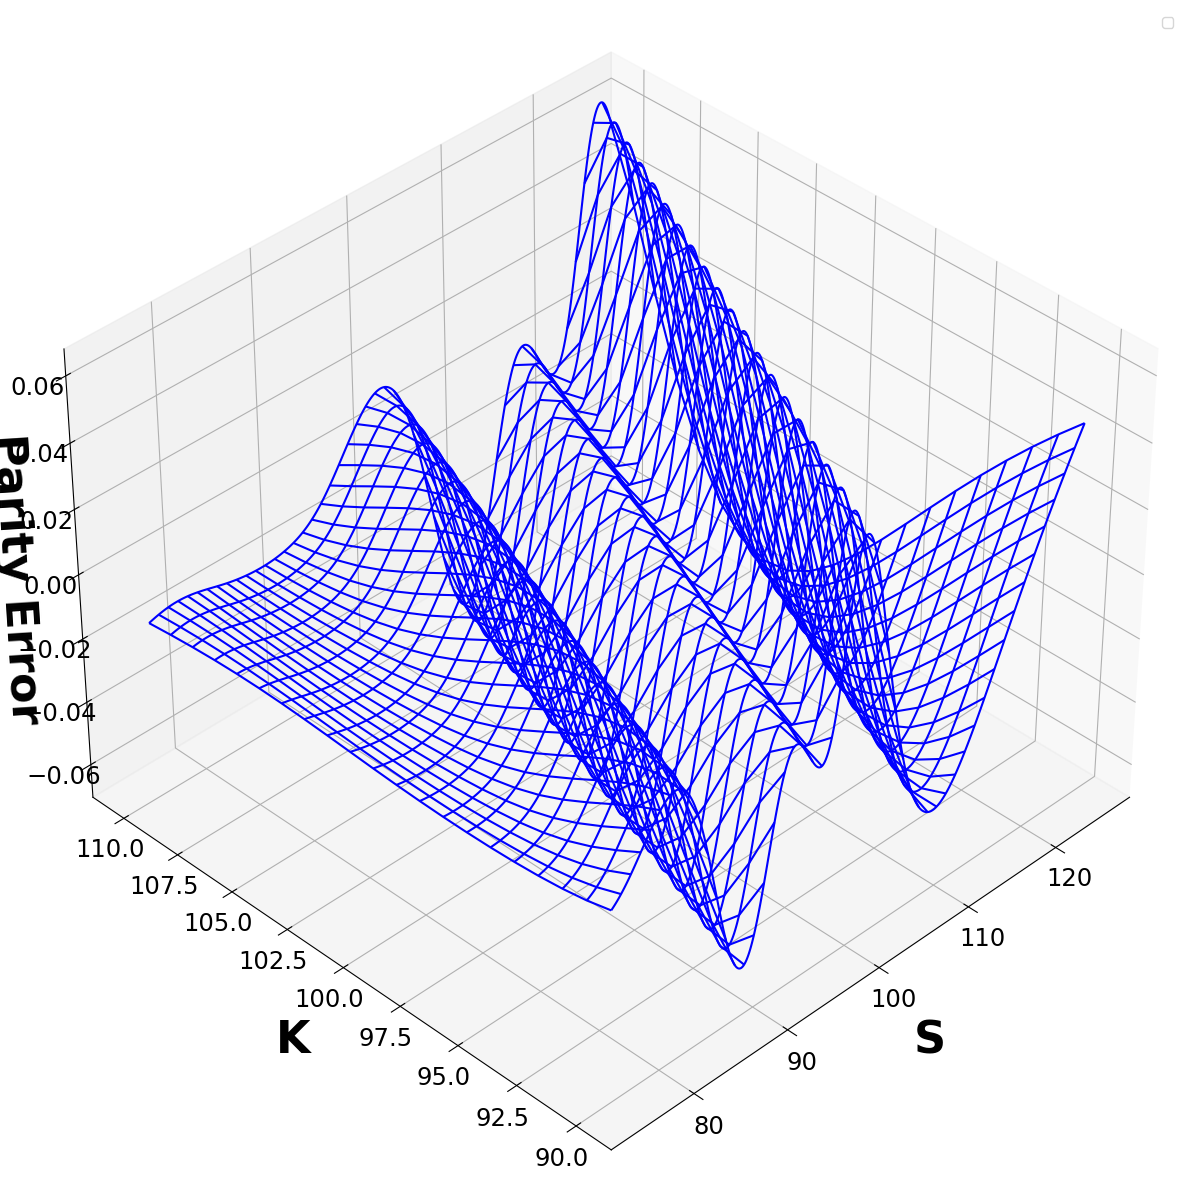

[vol=0.15, seed=496, T=0.2400] -> Parity MAE=0.0225, MSE=0.0008


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os


vol = 0.15
seed = 496
days = 60
r_val = 0.0

call_model_path = f'gbm_call_trained_models/gbm_european_call_{vol}_{seed}.h5'
put_model_path  = f'gbm_put_trained_models/gbm_european_put_{vol}_{seed}.h5'


if not os.path.exists(call_model_path):
    raise FileNotFoundError(f"Cannot find file: {call_model_path}")
if not os.path.exists(put_model_path):
    raise FileNotFoundError(f"Cannot find file: {put_model_path}")

call_model = tf.keras.models.load_model(call_model_path)
put_model  = tf.keras.models.load_model(put_model_path)

T_val = days / 250.0
n_S = 10000
S_grid = np.linspace(75,125,n_S)
K_vals = np.arange(90,111,1)

parity_2d = np.zeros((n_S, len(K_vals)), dtype=np.float64)

for k_idx, K_num in enumerate(K_vals):
    S_array = S_grid.reshape(-1,1)
    K_array = np.full_like(S_array, K_num)
    T_array = np.full_like(S_array, T_val)
    S_tf = tf.constant(S_array, dtype=tf.float64)
    K_tf = tf.constant(K_array, dtype=tf.float64)
    T_tf = tf.constant(T_array, dtype=tf.float64)

    X_call = tf.concat([
        S_tf/(K_tf * tf.exp(-r_val*T_tf)),
        T_tf
    ], axis=1)
    outC = call_model(X_call)
    call_vals = K_tf * tf.where(
        tf.greater(T_tf, 1e-3),
        outC,
        tf.maximum(S_tf/K_tf - 1.0, 0.0)
    )
    call_np = call_vals.numpy().reshape(-1)

    X_put = tf.concat([
        S_tf/(K_tf * tf.exp(-r_val*T_tf)),
        T_tf
    ], axis=1)
    outP = put_model(X_put)
    put_vals = K_tf * tf.where(
        tf.greater(T_tf, 1e-3),
        outP,
        tf.maximum(1.0 - S_tf/K_tf, 0.0)
    )
    put_np = put_vals.numpy().reshape(-1)

    discount = np.exp(-r_val*T_val)
    theory_diff = S_array.flatten() - (K_num * discount)
    model_diff = call_np - put_np
    parity_err = model_diff - theory_diff
    parity_2d[:, k_idx] = parity_err

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.view_init(37.5, 225)

S_3d = np.repeat(S_grid.reshape(-1,1), len(K_vals), axis=1)
K_3d = np.repeat(K_vals.reshape(1,-1), n_S, axis=0)

ax.plot_wireframe(S_3d, K_3d, parity_2d, color='blue')

ax.tick_params(axis='x', labelsize=17.5)
ax.tick_params(axis='y', labelsize=17.5)
ax.tick_params(axis='z', labelsize=17.5)

ax.set_xlabel('S', fontsize=32, labelpad=20, fontweight='bold')
ax.set_ylabel('K', fontsize=32, labelpad=20, fontweight='bold')
ax.set_zlabel('Parity Error', fontsize=32, labelpad=5, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

mae = np.mean(np.abs(parity_2d))
mse = np.mean(parity_2d**2)
print(f"[vol={vol}, seed={seed}, T={T_val:.4f}] -> Parity MAE={mae:.4f}, MSE={mse:.4f}")


# **PC-Parity (Heston)**

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

seeds_list = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
vol_list = [0.125, 0.15, 0.175]
days_list = [60,70,80,90,100,110,120]
n_S = 10000
S_array = np.linspace(75, 125, n_S)
K_vals = np.arange(90,111,1)
r_val = 0.00

results = []

for vol in vol_list:
    for days in days_list:
        T_val = days / 250.0

        mae_list = []
        mse_list = []

        for seed in seeds_list:
            call_model_path = f'heston_call_trained_models/heston_european_call_{vol}_{seed}.h5'
            put_model_path  = f'heston_put_trained_models/heston_european_put_{vol}_{seed}.h5'

            if (not os.path.exists(call_model_path)) or (not os.path.exists(put_model_path)):
                print(f"Skipping vol={vol}, T={days}, seed={seed}, missing .h5 file")
                continue

            call_model = tf.keras.models.load_model(call_model_path)
            put_model  = tf.keras.models.load_model(put_model_path)

            parity_errors_2d = np.zeros((n_S, len(K_vals)), dtype=np.float64)

            discount = math.exp(-r_val * T_val)

            for k_index, K_num in enumerate(K_vals):
                S_lin = S_array.reshape(-1,1)
                K_lin = np.full_like(S_lin, K_num, dtype=np.float64)
                T_lin = np.full_like(S_lin, T_val, dtype=np.float64)
                r_lin = np.full_like(S_lin, r_val, dtype=np.float64)

                S_tf = tf.constant(S_lin, dtype=tf.float64)
                K_tf = tf.constant(K_lin, dtype=tf.float64)
                T_tf = tf.constant(T_lin, dtype=tf.float64)

                X_call = tf.concat(
                    [S_tf / (K_tf * tf.exp(-r_lin*T_tf)), T_tf],
                    axis=1
                )
                outC = call_model(X_call)
                call_vals = K_tf * tf.where(
                    tf.greater(T_tf, 1e-3),
                    outC,
                    tf.maximum(S_tf/K_tf - 1.0, 0.0)
                )
                call_np = call_vals.numpy().reshape(-1)

                X_put = tf.concat(
                    [S_tf / (K_tf * tf.exp(-r_lin*T_tf)), T_tf],
                    axis=1
                )
                outP = put_model(X_put)
                put_vals = K_tf * tf.where(
                    tf.greater(T_tf, 1e-3),
                    outP,
                    tf.maximum(1.0 - S_tf/K_tf, 0.0)
                )
                put_np = put_vals.numpy().reshape(-1)

                theory_diff = S_lin.flatten() - K_num*discount
                model_diff  = call_np - put_np

                parity_err = model_diff - theory_diff
                parity_errors_2d[:, k_index] = parity_err

            mae_seed = np.mean(np.abs(parity_errors_2d))
            mse_seed = np.mean(parity_errors_2d**2)
            mae_list.append(mae_seed)
            mse_list.append(mse_seed)

        if len(mae_list) > 0:
            mae_mean = np.mean(mae_list)
            mae_std  = np.std(mae_list, ddof=1)
            mse_mean = np.mean(mse_list)
            mse_std  = np.std(mse_list, ddof=1)
        else:
            mae_mean, mae_std, mse_mean, mse_std = (None, None, None, None)

        results.append({
            "Vol": vol,
            "TTM_days": days,
            "ParMAE_Mean": mae_mean,
            "ParMAE_Std": mae_std,
            "ParMSE_Mean": mse_mean,
            "ParMSE_Std": mse_std
        })

df = pd.DataFrame(results)
df.sort_values(by=["Vol","TTM_days"], inplace=True)
df.reset_index(drop=True, inplace=True)

print("\n===== PUT–CALL PARITY TABLE (Mean & Std across 10 seeds, Heston) =====")
print(df)
print("=======================================================================\n")


===== PUT–CALL PARITY TABLE (Mean & Std across 10 seeds, Heston) =====
      Vol  TTM_days  ParMAE_Mean  ParMAE_Std  ParMSE_Mean  ParMSE_Std
0   0.125        60     0.105982    0.069679     0.026277    0.031446
1   0.125        70     0.113123    0.079075     0.030279    0.038171
2   0.125        80     0.118764    0.088866     0.033995    0.045571
3   0.125        90     0.124296    0.097590     0.037334    0.053322
4   0.125       100     0.128792    0.105704     0.040233    0.061254
5   0.125       110     0.131755    0.113578     0.042693    0.069395
6   0.125       120     0.133070    0.121483     0.044791    0.077925
7   0.150        60     0.101372    0.041618     0.020576    0.013379
8   0.150        70     0.104996    0.044570     0.022030    0.014869
9   0.150        80     0.107508    0.046327     0.022817    0.015832
10  0.150        90     0.108836    0.047875     0.023100    0.016474
11  0.150       100     0.109014    0.048945     0.022939    0.016867
12  0.150       11

<ipython-input-53-86b1629f38c9>:106: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


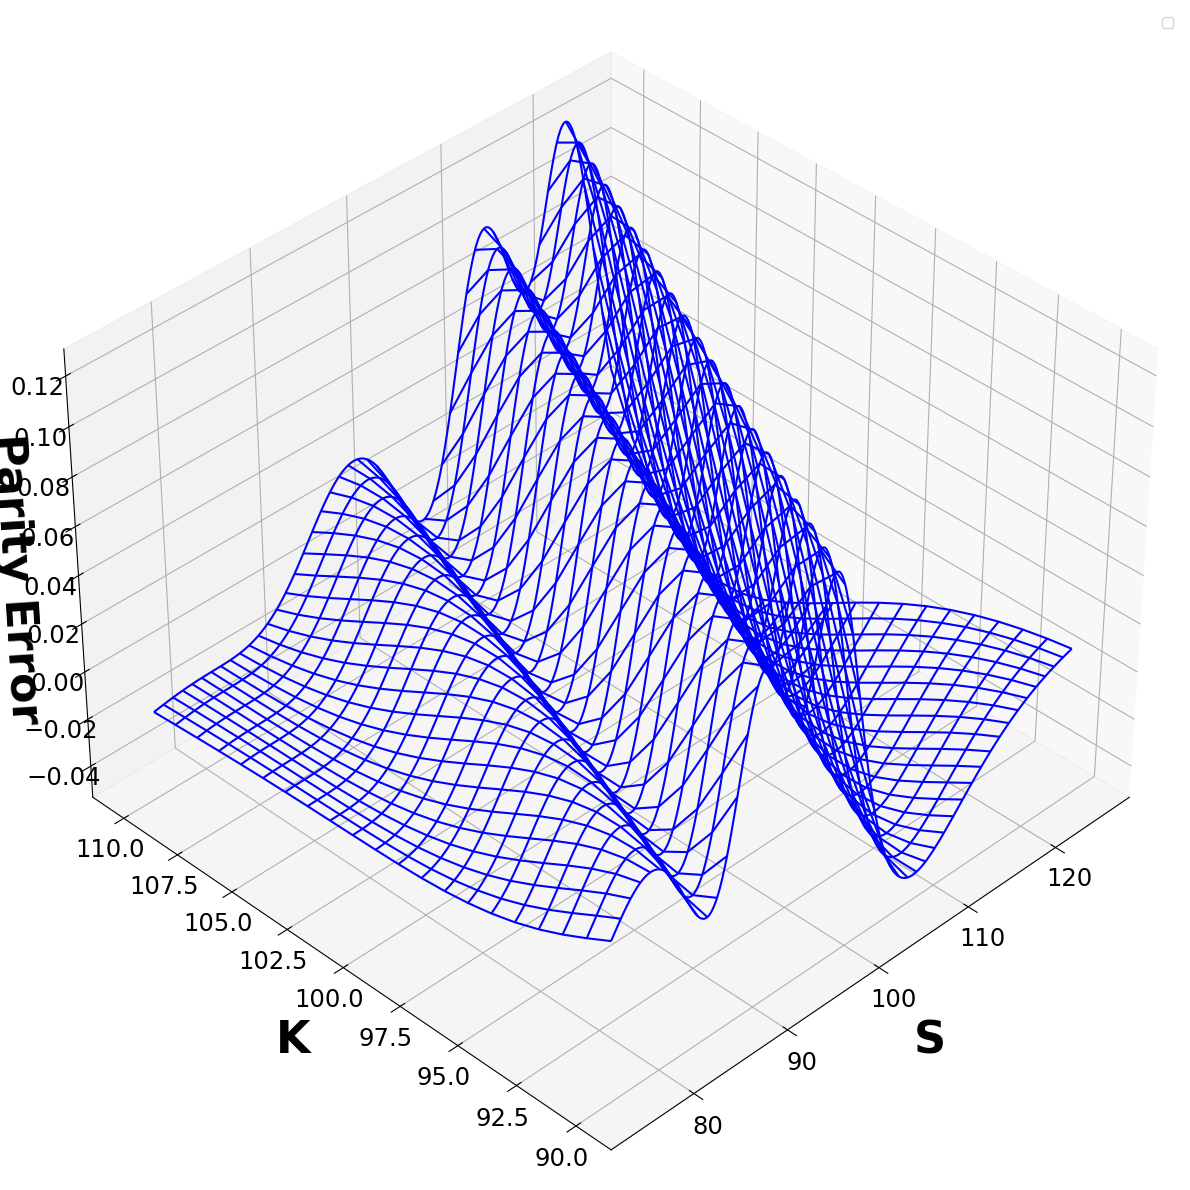

[Heston vol=0.15, seed=495, T=0.2400] -> Parity MAE=0.0385, MSE=0.0025


In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import math
import os

vol = 0.15
seed = 495
days = 60
r_val = 0.0

call_model_path = f'heston_call_trained_models/heston_european_call_{vol}_{seed}.h5'
put_model_path  = f'heston_put_trained_models/heston_european_put_{vol}_{seed}.h5'

if not os.path.exists(call_model_path):
    raise FileNotFoundError(f"Cannot find file: {call_model_path}")
if not os.path.exists(put_model_path):
    raise FileNotFoundError(f"Cannot find file: {put_model_path}")

call_model = tf.keras.models.load_model(call_model_path)
put_model  = tf.keras.models.load_model(put_model_path)

T_val = days / 250.0

n_S = 10000
S_grid = np.linspace(75,125,n_S)
K_vals = np.arange(90,111,1)

parity_2d = np.zeros((n_S, len(K_vals)), dtype=np.float64)

discount = math.exp(-r_val * T_val)

for idxK, K_num in enumerate(K_vals):
    S_lin = S_grid.reshape(-1,1)
    K_lin = np.full_like(S_lin, K_num, dtype=np.float64)
    T_lin = np.full_like(S_lin, T_val, dtype=np.float64)

    S_tf = tf.constant(S_lin, dtype=tf.float64)
    K_tf = tf.constant(K_lin, dtype=tf.float64)
    T_tf = tf.constant(T_lin, dtype=tf.float64)

    X_call = tf.concat([
        S_tf/(K_tf*tf.exp(-r_val*T_tf)),
        T_tf
    ], axis=1)
    outC = call_model(X_call)
    call_vals = K_tf * tf.where(
        tf.greater(T_tf, 1e-3),
        outC,
        tf.maximum(S_tf/K_tf - 1.0, 0.0)
    )
    call_np = call_vals.numpy().reshape(-1)

    X_put = tf.concat([
        S_tf/(K_tf*tf.exp(-r_val*T_tf)),
        T_tf
    ], axis=1)
    outP = put_model(X_put)
    put_vals = K_tf * tf.where(
        tf.greater(T_tf, 1e-3),
        outP,
        tf.maximum(1.0 - S_tf/K_tf, 0.0)
    )
    put_np = put_vals.numpy().reshape(-1)

    theory_diff = (S_lin.flatten() - K_num * discount)
    model_diff  = (call_np - put_np)

    parity_err = model_diff - theory_diff
    parity_2d[:, idxK] = parity_err

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(projection='3d')

ax.view_init(37.5, 225)

S_3d = np.repeat(S_grid.reshape(-1,1), len(K_vals), axis=1)
K_3d = np.repeat(K_vals.reshape(1,-1), n_S, axis=0)

ax.plot_wireframe(S_3d, K_3d, parity_2d, color='blue')

ax.tick_params(axis='x', labelsize=17.5)
ax.tick_params(axis='y', labelsize=17.5)
ax.tick_params(axis='z', labelsize=17.5)

ax.set_xlabel('S', fontsize=32, labelpad=20, fontweight='bold')
ax.set_ylabel('K', fontsize=32, labelpad=20, fontweight='bold')
ax.set_zlabel('Parity Error', fontsize=32, labelpad=5, fontweight='bold')
ax.legend()

plt.tight_layout()
plt.show()

mae = np.mean(np.abs(parity_2d))
mse = np.mean(parity_2d**2)
print(f"[Heston vol={vol}, seed={seed}, T={T_val:.4f}] -> Parity MAE={mae:.4f}, MSE={mse:.4f}")

# **American Put**

In [ ]:
import argparse, re, sys
from pathlib import Path
import pandas as pd
import numpy as np

FNAME_RE = re.compile(r"^results_american_put_(?P<vol>[0-9.]+)_(?P<seed>\d+)\.csv$", re.I)

DEFAULT_METRICS = [
    "option_mad_result",
    "option_mse_result",
    "delta_mad_result",
    "delta_mse_result",
]

def parse_args():
    p = argparse.ArgumentParser(description="Per-vol mean/std across seeds for American put results.")
    p.add_argument("--results_dir", default=".", help="Directory containing CSVs.")
    p.add_argument("--glob", default="results_american_put_*.csv",
                   help='Glob pattern (default: "results_american_put_*.csv").')
    p.add_argument("--keys", default="ttm",
                   help="Comma-separated key columns used to align rows (default: ttm).")
    p.add_argument("--metrics", default=",".join(DEFAULT_METRICS),
                   help="Comma-separated metric columns to aggregate (defaults to known columns).")
    p.add_argument("--out_dir", default="vol_aggregates",
                   help="Directory to write per-vol and combined CSVs.")
    args, _ = p.parse_known_args()
    return args

def flatten_columns(df: pd.DataFrame) -> pd.DataFrame:
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ["_".join([str(c) for c in col if str(c) != ""]) for col in df.columns.values]
    return df

def main():
    args = parse_args()
    keys = [k.strip() for k in args.keys.split(",") if k.strip()]
    metrics = [m.strip() for m in args.metrics.split(",") if m.strip()]
    out_dir = Path(args.out_dir)
    out_dir.mkdir(parents=True, exist_ok=True)

    files = sorted(Path(args.results_dir).glob(args.glob))
    if not files:
        print("No files matched. Check --results_dir/--glob.", file=sys.stderr)
        sys.exit(1)

    all_rows = []
    for fp in files:
        m = FNAME_RE.match(fp.name)
        if not m:
            continue
        vol = float(m.group("vol"))
        seed = int(m.group("seed"))
        try:
            df = pd.read_csv(fp)
        except Exception as e:
            print(f"[WARN] skip {fp.name}: {e}", file=sys.stderr)
            continue

        missing_keys = [k for k in keys if k not in df.columns]
        if missing_keys:
            print(f"[WARN] skip {fp.name}: missing key columns {missing_keys}", file=sys.stderr)
            continue

        present_metrics = [c for c in metrics if c in df.columns]
        if not present_metrics:
            print(f"[WARN] skip {fp.name}: none of requested metrics {metrics} found.", file=sys.stderr)
            continue

        keep_cols = keys + present_metrics
        sub = df[keep_cols].copy()
        sub["vol"] = vol
        sub["seed"] = seed
        all_rows.append(sub)

    if not all_rows:
        print("No usable rows after reading files.", file=sys.stderr)
        sys.exit(1)

    big = pd.concat(all_rows, ignore_index=True)

    for c in metrics:
        if c in big.columns:
            big[c] = pd.to_numeric(big[c], errors="coerce")

    grouped = big.groupby(["vol"] + keys)

    agg_dict = {}
    for c in metrics:
        if c in big.columns:
            agg_dict[c] = ["mean", "std", "count"]  # count for sanity

    per_vol_entry_stats = grouped.agg(agg_dict).reset_index()
    per_vol_entry_stats = flatten_columns(per_vol_entry_stats)

    combined_path = out_dir / "combined_per_vol_entry_stats.csv"
    per_vol_entry_stats.to_csv(combined_path, index=False)

    # Also export separate files per vol
    for vol, dfv in per_vol_entry_stats.groupby("vol"):
        out_path = out_dir / f"vol_{vol:g}_entry_stats.csv"
        dfv.to_csv(out_path, index=False)

    per_vol_summary_rows = []
    for vol, dfv in per_vol_entry_stats.groupby("vol"):
        row = {"vol": vol}
        for c in metrics:
            mean_col = f"{c}_mean"
            std_col  = f"{c}_std"
            if mean_col in dfv.columns:
                row[f"{c}_mean_of_means"] = dfv[mean_col].mean()
            if std_col in dfv.columns:
                row[f"{c}_mean_of_stds"] = dfv[std_col].mean()
        per_vol_summary_rows.append(row)
    per_vol_summary = pd.DataFrame(per_vol_summary_rows).sort_values("vol")
    per_vol_summary_path = out_dir / "per_vol_summary_over_entries.csv"
    per_vol_summary.to_csv(per_vol_summary_path, index=False)

    pd.set_option("display.max_rows", 20)
    pd.set_option("display.width", 120)
    print("\nCombined per-vol, per-entry stats (first 20 rows):")
    print(per_vol_entry_stats.head(20).to_string(index=False))
    print(f"\nSaved combined table to: {combined_path}")
    print("Also wrote per-vol CSVs and a per-vol summary:\n  -", per_vol_summary_path)

if __name__ == "__main__":
    main()

In [ ]:
import pandas as pd
import numpy as np

seeds = [413, 491, 492, 493, 494, 495, 496, 497, 498, 499]
volatilities = [0.125, 0.15, 0.175]

aggregated_data = {}

for volatility in volatilities:
    data_frames = []

    for seed in seeds:
        filename = f"american_results/results_american_put_{volatility}_{seed}_.csv"
        file_path = filename

        try:
            df = pd.read_csv(file_path)
            data_frames.append(df)
        except FileNotFoundError:
            print(f"File {filename} not found. Skipping.")

    if data_frames:

        combined_df = pd.concat(data_frames, axis=1)

        n = len(data_frames)
        for i, column in enumerate(data_frames[0].columns):
            selected_columns = combined_df.iloc[:, i::len(data_frames[0].columns)]
            means = selected_columns.mean(axis=1).round(3)
            stds = selected_columns.std(axis=1).round(3)

            aggregated_data[f"{column}_mean_volatility_{volatility}"] = means
            aggregated_data[f"{column}_std_volatility_{volatility}"] = stds

final_df = pd.DataFrame(aggregated_data)

print(final_df.head())

final_df.to_csv("american_results/american_put_aggregated_results.csv", index=False)

In [ ]:
ls

 american_boundary_plots/
'American Option Exercise Boundary.ipynb'
 american_put_script.sh
 american_results/
 calibration_summary.csv
'Copy of Copy of Copy of Copy of Copy of run.ipynb'
'Copy of Copy of Copy of Copy of run.ipynb'
'Copy of Copy of Copy of run.ipynb'
'Copy of Copy of run.ipynb'
'Copy of run.ipynb'
'FINN - Brainstorm next real world experiments.gdoc'
'FINN_PreCovid (2).ipynb'
'FINN Result Analysis.ipynb'
 gbm_american_put_trained_models/
 gbm_call_trained_models/
 gbm_gamma_call_trained_models/
 gbm_put_trained_models/
 gbm_results/
 gbm_results_gamma/
 heston_analytical.py
 heston_call_trained_models/
 heston_put_trained_models/
 heston_results/
'iv experiment'/
 Jump-Diffusion-Calibrator-master/
 mc_calibration_six.csv
 mc_panel_2013_tc05.png
 mc_pnl_six.csv
 panel_2008_tc0.png
 panel_2008_tc1.png
 panel_2008_tc2.png
 panel_2011_tc0.png
 panel_2011_tc1.png
 panel_2011_tc2.png
 panel_2013_tc0.png
 panel_2013_tc1.png
 panel_2013_tc2.png
 panel_2020_tc0.png
 panel_2020_t